for Swati-san's microglia data, and practice for MicrogliaTrackingGUI development

In [6]:
import sys
import os

dir_notebook = os.path.dirname(os.path.abspath("__file__"))
# 親ディレクトリのパスを取得
dir_parent = os.path.dirname(dir_notebook)
if not dir_parent in sys.path:
    sys.path.append(dir_parent)

from PyQt5.QtWidgets import QMainWindow, QWidget, QGridLayout, QVBoxLayout, QHBoxLayout, QApplication
from optic.config import *
from optic.controls import *
from optic.gui import *
from optic.io import *
from optic.manager import *
from optic.gui.bind_func import *

class Suite2pROICheckGUI(QMainWindow):
    def __init__(self):
        APP_NAME = "SUITE2P_ROI_CHECK"
        QMainWindow.__init__(self)
        self.widget_manager, self.config_manager, self.data_manager, self.control_manager, self.layout_manager = initManagers(
            WidgetManager(), ConfigManager(), DataManager(), ControlManager(), LayoutManager()
        )
        self.config_manager.setCurrentApp(APP_NAME)
        self.app_keys = self.config_manager.gui_defaults["APP_KEYS"]
        self.app_key_pri = self.app_keys[0]

        self.setupUI_done = False
        setupMainWindow(self, self.config_manager.gui_defaults)

        self.initUI()

    """
    setup UI Function
    """
    def initUI(self):
        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)
        self.layout_main = QGridLayout(self.central_widget)

        # FileLoadUI用のレイアウト
        self.layout_file_load = QVBoxLayout()
        self.setupFileLoadUI()
        self.layout_main.addLayout(self.layout_file_load, 1, 0, 1, 1)

        # メインUI用のレイアウト
        self.layout_main_ui = QGridLayout()
        self.layout_main.addLayout(self.layout_main_ui, 0, 0, 1, 1)

    def setupFileLoadUI(self):
        file_load_widget = QWidget()
        layout = QVBoxLayout(file_load_widget)
        # ファイル読み込み用のUIを追加
        layout.addLayout(self.makeLayoutSectionBottom())
        # bindFunc
        self.bindFuncFileLoadUI()

        self.layout_file_load.addWidget(file_load_widget)

    def loadFilePathsandInitialize(self):
        self.control_manager, self.data_manager = initManagers(self.control_manager, self.data_manager)
        success = self.loadData()
        if success:
            self.setupMainUI()
        else:
            return

    def setupMainUI(self):
        if self.setupUI_done:
            # メインUIのクリア
            clearLayout(self.layout_main_ui)
        
        # 新しいメインUIの設定
        self.setupMainUILayouts()
        self.setupControls()
        self.bindFuncAllWidget()

        self.setupUI_done = True

    def loadData(self):
        return True

    def setupMainUILayouts(self):
        self.layout_main_ui.addLayout(self.makeLayoutSectionLeftUpper(), 0, 0)
        self.layout_main_ui.addLayout(self.makeLayoutSectionRightUpper(), 0, 1)

    def setupControls(self):
        # self.control_manager.table_controls[self.app_key_pri].setupWidgetROITable(self.app_key_pri)
        # self.control_manager.view_controls[self.app_key_pri] = ViewControl(
        #     key_app=self.app_key_pri,
        #     q_view=self.widget_manager.dict_view[self.app_key_pri], 
        #     q_scene=self.widget_manager.dict_scene[self.app_key_pri], 
        #     data_manager=self.data_manager, 
        #     widget_manager=self.widget_manager,
        #     config_manager=self.config_manager,
        #     control_manager=self.control_manager,
        # )
        # self.control_manager.view_controls[self.app_key_pri].setViewSize()
        pass

    """
    makeLayout Function; Component
    小要素のLayout
    return -> Layout
    """
    "Upper Left"
    def makeLayoutComponentImageView(self):
        layout = makeLayoutViewWithZTSlider(
            self.widget_manager, 
            self.app_key_pri,
            slider_z=True,
            slider_t=True,
            key_label_z=f"{self.app_key_pri}_plane_z",
            key_label_t=f"{self.app_key_pri}_plane_t",
            key_slider_z=f"{self.app_key_pri}_z",
            key_slider_t=f"{self.app_key_pri}_t",
            stack_size_z=10,
            stack_size_t=20,
            )
        return layout

    "Upper Right"


    "Bottom"
    def makeLayoutComponentFileLoadUI(self):
        layout = QVBoxLayout()

        # LineEdit
        list_label = ["Microglia tiff image file path"]
        list_key = [f"{self.app_key_pri}_path_tiff"]
        for label, key in zip(list_label, list_key):
            layout.addLayout(makeLayoutLoadFileWidget(
                self.widget_manager, 
                label=label, 
                key_label=key, 
                key_lineedit=key, 
                key_button=key
            ))
        # Button
        layout.addLayout(makeLayoutLoadFileExitHelp(self.widget_manager))
        return layout

    """
    makeLayout Function; Section
    領域レベルの大Layout
    """
    def makeLayoutSectionLeftUpper(self):
        return
    
    def makeLayoutSectionRightUpper(self):
        layout = QVBoxLayout()
        layout.addLayout(self.makeLayoutComponentImageView())
        return layout

    def makeLayoutSectionBottom(self):
        layout = self.makeLayoutComponentFileLoadUI()
        return layout

    """
    bindFunc Function
    配置したwidgetに関数を紐づけ
    """
    def bindFuncFileLoadUI(self):        
        list_key = [f"{self.app_key_pri}_path_tiff"]
        list_filetype = [Extension.TIFF]
        for key, filetype in zip(list_key, list_filetype):
            bindFuncLoadFileWidget(
                q_widget=self, 
                q_button=self.widget_manager.dict_button[key], 
                q_lineedit=self.widget_manager.dict_lineedit[key], 
                filetype=filetype
            )

        self.widget_manager.dict_button["load_file"].clicked.connect(lambda: self.loadFilePathsandInitialize())
        bindFuncExit(q_window=self, q_button=self.widget_manager.dict_button["exit"])

    def bindFuncAllWidget(self):
        pass


if __name__ == "__main__":
    app = QApplication(sys.argv) if QApplication.instance() is None else QApplication.instance()
    applyAppStyle(app)
    gui = Suite2pROICheckGUI()
    gui.show()
    sys.exit(app.exec_())

SystemExit: 0

c:\Users\HyperPC_Smee\anaconda3\envs\itkelastix\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
import tifffile
path_tiff = '../data/swati-san/test_XYCZ.tif'


# TIFFファイルを開く
with tifffile.TiffFile(path_tiff) as tif:
    # 最初のシリーズ（通常は1つだけ）の次元情報を取得
    series = tif.series[0]
    
    # 軸の順序を取得
    axes = series.axes
    
    # 各次元のサイズを取得
    shape = series.shape
    
    # 次元情報を表示
    print(f"Axes order: {axes}")
    print(f"Shape: {shape}")

    # 画像データを読み込む（オプション）
    data = tif.asarray()
    print(f"Data shape: {data.shape}")

Axes order: ZCYX
Shape: (8, 2, 568, 562)
Data shape: (8, 2, 568, 562)


In [27]:
from typing import Any, Tuple

def standardizeTIFFStack(data: np.ndarray, original_axes: str, target_axes: str='XYCZT') -> np.ndarray:
    """
    standardize the TIFF stack's axes order and implement missing axes
    """
    original_axes = original_axes.upper()
    target_axes = target_axes.upper()

    for ax in target_axes:
        if ax not in original_axes:
            original_axes += ax
            data = np.expand_dims(data, axis=-1)

    trans_order = [original_axes.index(ax) for ax in target_axes]

    new_data = np.transpose(data, trans_order)

    return new_data

In [28]:
import tifffile
path_tiff = '../data/swati-san/test_XY.tif'


# TIFFファイルを開く
with tifffile.TiffFile(path_tiff) as tif:
    # 最初のシリーズ（通常は1つだけ）の次元情報を取得
    series = tif.series[0]
    
    # 軸の順序を取得
    axes = series.axes
    print(axes)
    print("XYCZT")
    
    new_data = standardizeTIFFStack(series.asarray(), axes)
    
    # 次元情報を表示
    print(f"Axes order: {new_data.shape}")

    # 画像データを読み込む（オプション）
    data = tif.asarray()
    print(f"Data shape: {data.shape}")

YX
XYCZT
Axes order: (562, 568, 1, 1, 1)
Data shape: (568, 562)


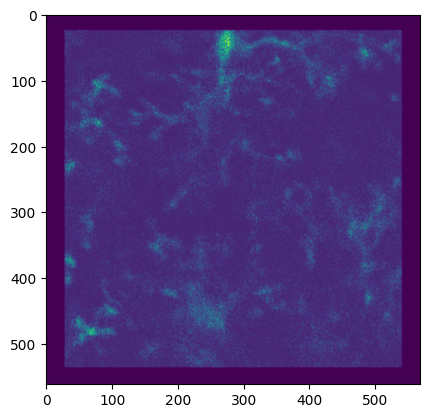

In [23]:
import matplotlib.pyplot as plt

plt.imshow(new_data[:, :, 0, 0, 0])